# Problem 5: Russian plate detection using HaarCascade method

Using OpenCV's Viola-Jones (Haar cascade) detector with `haarcascade_russian_plate_number.xml`.


In [13]:
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
import os


In [14]:
# Input / output paths (run notebook from asns/asn4/)
image_path = Path(os.path.join('imgs', 'rus_plate.jpg'))
cascade_path = Path('haarcascade_russian_plate_number.xml')
output_path = Path(os.path.join('output', 'asn4_p4_rus_plate_detected.jpg'))

img = cv2.imread(str(image_path))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plate_detector = cv2.CascadeClassifier(str(cascade_path))

# Viola-Jones detection (for count)
coarse_plates = plate_detector.detectMultiScale(
    gray, scaleFactor=1.05, minNeighbors=8, minSize=(450, 130)
)
coarse_plates = sorted(coarse_plates, key=lambda r: (r[1], r[0]))

# Simple contour-based tight boxes (for drawing)
_, binary_inv = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY_INV)
binary_inv = cv2.morphologyEx(
    binary_inv,
    cv2.MORPH_CLOSE,
    cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)),
    iterations=1
)

contours, _ = cv2.findContours(binary_inv, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

plates = []
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    aspect = w / float(h)
    if 500 <= w <= 700 and 90 <= h <= 150 and aspect > 4.0:
        plates.append((x, y, w, h))

plates = sorted(plates, key=lambda r: (r[1], r[0]))

print("Detected Russian number plates:", len(coarse_plates))  # Viola-Jones count
print("Boxes used for drawing:", len(plates))

Detected Russian number plates: 4
Boxes used for drawing: 4


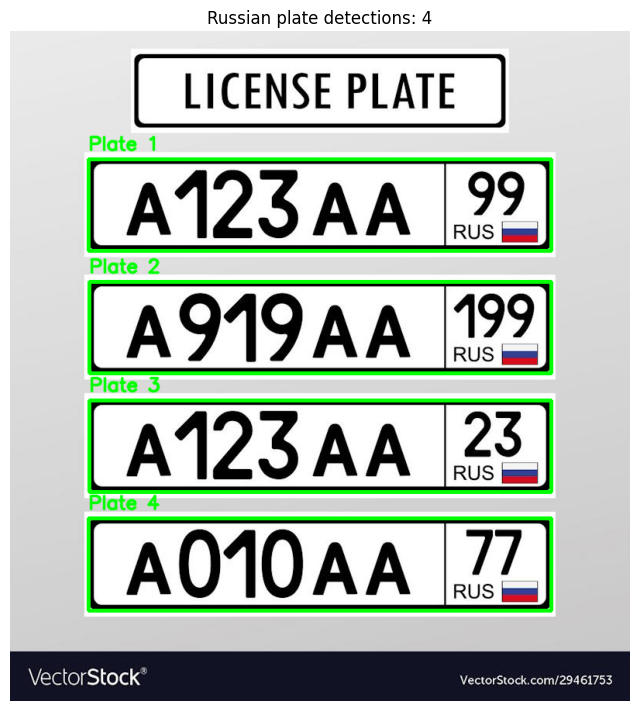

Saved annotated result to: /Users/oren/code/cme466/asns/asn4/output/asn4_p4_rus_plate_detected.jpg


In [15]:
annotated = img.copy()
for i, (x, y, w, h) in enumerate(plates, start=1):
    cv2.rectangle(annotated, (x, y), (x + w, y + h), (0, 255, 0), 4)
    cv2.putText(annotated, f'Plate {i}', (x, max(30, y - 12)),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2, cv2.LINE_AA)


output_path.parent.mkdir(parents=True, exist_ok=True)
cv2.imwrite(str(output_path), annotated)

plt.figure(figsize=(8, 9))
plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
plt.title(f'Russian plate detections: {len(plates)}')
plt.axis('off')
plt.show()

print(f'Saved annotated result to: {output_path.resolve()}')
